In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/share/fonts/type1: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/type1/texlive-fonts-recommended: 

In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
# online_retail data 
oln = pd.read_excel('../input/data-1/online_retail.xlsx')
oln

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
oln.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


columns
 - InvoiceNo : 주문번호
 - StockCode : 상품코드
 - Description : 상품 설명
 - Quantity : 수량
 - InvoceDate : 주문날짜
 - UnitPrice : 주문번호
 - CustomerID : 고객번호
 - Country : 국가

In [14]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
# 통계치 확인
oln.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
oln.describe(include=np.object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [17]:
# 데이터 내용 정리해서 출력하기
print("총 데이터 수: ", oln.shape[0]*oln.shape[1])
print("총 결측치 수: {} / 전체데이터의 {:.2f}% ".format(oln.isnull().sum().sum(), (oln.isnull().sum().sum()*100)/(oln.shape[0]*oln.shape[1])))
print("전체 국가 수: ", oln.Country.nunique())
print("전체 판매 물건 수: ", oln.Description.nunique())

총 데이터 수:  4335272
총 결측치 수: 136534 / 전체데이터의 3.15% 
전체 국가 수:  38
전체 판매 물건 수:  4223


In [18]:
oln.cloumns = oln.columns.str.lower()
oln.cloumns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [19]:
# 결측치 확인
oln.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# 결측치 컬럼 내용 확인
oln[oln.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [21]:
# 결측치 제거
oln1 = oln.dropna()
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [22]:
# columns type 변경
oln1['CustomerID'] = oln1['CustomerID'].astype('int64')
oln1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [23]:
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [24]:
# min, max 판매수량의 음수 값 확인
print(min(oln1['Quantity']), max(oln1['Quantity']))
print(min(oln1['UnitPrice']), max(oln1['UnitPrice']))

-80995 80995
0.0 38970.0


In [25]:
# 음수인 값 제외하고 양수 값만 저장
oln1 = oln1[oln1['Quantity'] > 0]

In [26]:
# 가격 + 판매수량 = 총 사용 금액
oln1['spent'] = oln1['Quantity'] * oln1['UnitPrice']
oln1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [27]:
# 월별 상품 수량 주문 집계
oln1['year'] = oln1['InvoiceDate'].dt.year        # 연 (int)
oln1['month'] = oln1['InvoiceDate'].dt.month      # 월 (int)
oln1['day'] = oln1['InvoiceDate'].dt.day          # 일 (int)
oln1['weekday'] = oln1['InvoiceDate'].dt.weekday  # 일 (int)
oln1['hour'] = oln1['InvoiceDate'].dt.hour        # 시 (int)
oln1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


## **분석**

In [28]:
oln1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8


In [29]:
# 주문 순위가 Top 10 상품
oln1.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

In [30]:
# 주문 순위가 Down 10 상품
oln1.Description.value_counts().tail(10)

BLUE FELT HANGING HEART WITH FLOWER    1
GLASS CAKE COVER AND PLATE             1
CRACKED GLAZE EARRINGS RED             1
SCALLOP SHELL SOAP DISH                1
NECKLACE+BRACELET SET PINK DAISY       1
RUBY GLASS CLUSTER EARRINGS            1
PINK CHRYSANTHEMUMS ART FLOWER         1
72 CAKE CASES VINTAGE CHRISTMAS        1
WALL ART , THE MAGIC FOREST            1
PAPER CRAFT , LITTLE BIRDIE            1
Name: Description, dtype: int64

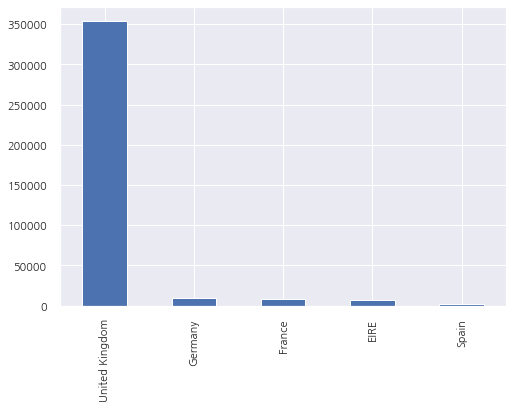

In [31]:
# 주문량이 많은 상위 5개 국가
oln1.Country.value_counts().head(5).plot.bar()
plt.show()

In [32]:
res1 = oln1[['CustomerID', 'spent']].groupby(['CustomerID']).sum()
res1.sort_values('spent', ascending=False)

res1 = res1[(res1['spent'] > 0)]

print('고객번호 {} 이 가장 소비를 많이 했다 {:.2f}'.format(int(res1['spent'].argmax()), res1['spent'].max()))
print('고객번호 {} 이 가장 소비를 적게 했다 {:.2f}'.format(int(res1['spent'].argmin()), res1['spent'].min()))

고객번호 1689 이 가장 소비를 많이 했다 280206.02
고객번호 3217 이 가장 소비를 적게 했다 3.75


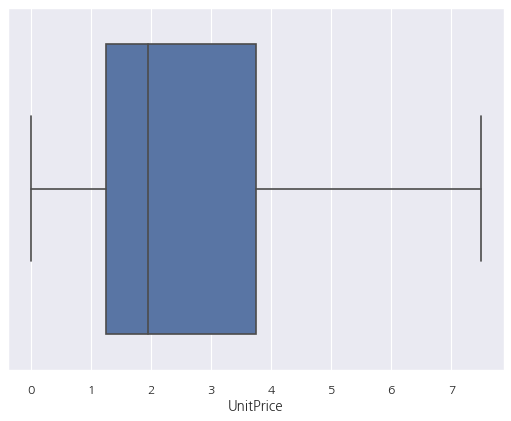

In [33]:
# 상품 금액대 별 box plot
f, ax = plt.subplots(1, 1, figsize=(8, 6), dpi = 80)

# box plot (최솟값, 최댓값, 중앙값 확인 가능)
sns.boxplot(oln1['UnitPrice'], showfliers = False, ax=ax)
plt.show()

In [39]:
chk0 = oln1[oln1['UnitPrice'] <= 8].shape[0]/oln1['UnitPrice'].shape[0] * 100
chk1 = oln1[oln1['UnitPrice'] <= 5].shape[0]/oln1['UnitPrice'].shape[0] * 100

print('8 파운드 이하 상품 주문이 {:.2f}% 를 차지 합니다'.format(chk0))
print('5 파운드 이하 상품 주문이 {:.2f}% 를 차지 합니다'.format(chk1))

8 파운드 이하 상품 주문이 93.28% 를 차지 합니다
5 파운드 이하 상품 주문이 87.14% 를 차지 합니다


In [40]:
chk2 = np.sum(oln1[oln1['UnitPrice'] <= 8].spent)/np.sum(oln1.spent)*100
chk3 = np.sum(oln1[oln1['UnitPrice'] <= 5].spent)/np.sum(oln1.spent)*100

print('수익의 {:.2f} % 는 8 파운드 이하의 상품에서 발생합니다'.format(chk2))
print('수익의 {:.2f} % 는 5 파운드 이하의 상품에서 발생합니다'.format(chk3))

수익의 88.09 % 는 8 파운드 이하의 상품에서 발생합니다
수익의 79.68 % 는 5 파운드 이하의 상품에서 발생합니다


In [41]:
oln1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'spent', 'year', 'month', 'day',
       'weekday', 'hour'],
      dtype='object')

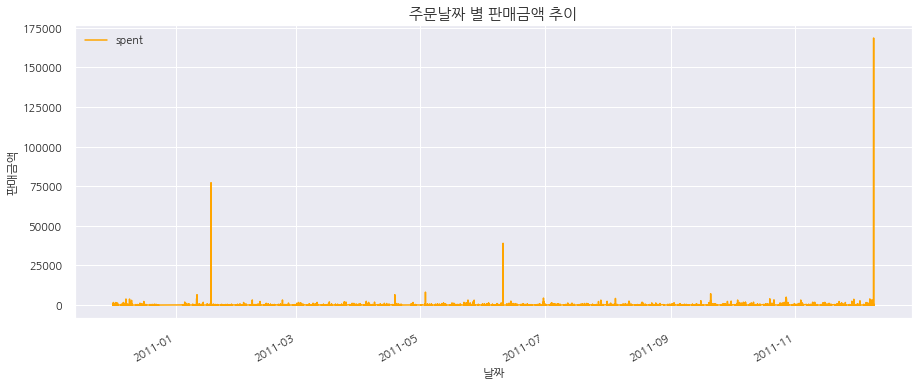

In [42]:
# 주문 날짜에 따른 판매 금액
oln1.plot(x='InvoiceDate', y='spent', color='orange', figsize=(15, 6))

plt.title('주문날짜 별 판매금액 추이', fontsize=15)
plt.xlabel('날짜')
plt.ylabel('판매금액')

plt.show()

In [43]:
# 주문번호 중복 제거
res2 = oln1.drop_duplicates(['InvoiceDate'], keep='first')
res2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010,12,1,2,8
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011,12,9,4,12
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011,12,9,4,12
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011,12,9,4,12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011,12,9,4,12


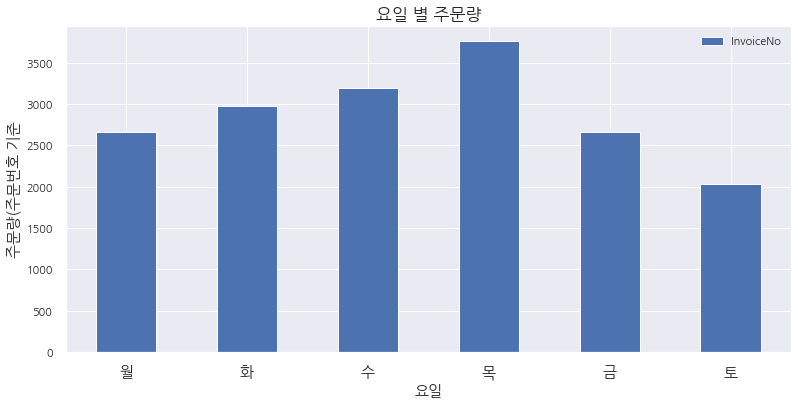

In [47]:
# 요일 별 주문량 확인
g1 = res2[['weekday', 'InvoiceNo']].groupby('weekday').count().plot(kind='bar', figsize=(13, 6))

g1.set_xlabel('요일', fontsize=15)
g1.set_ylabel('주문량(주문번호 기준', fontsize=15)
g1.set_title('요일 별 주문량',fontsize=17)
g1.set_xticklabels(('월', '화', '수', '목', '금', '토'), rotation='horizontal', fontsize=15)
g1.legend()

plt.show()

In [48]:
# 시간 별 주문량 확인
res3 = res2[['hour', 'InvoiceNo']].groupby('hour').count()
res3

,InvoiceNo
hour,
6,1
7,29
8,536
9,1316
10,2074
11,2128
12,2864
13,2420
14,2098


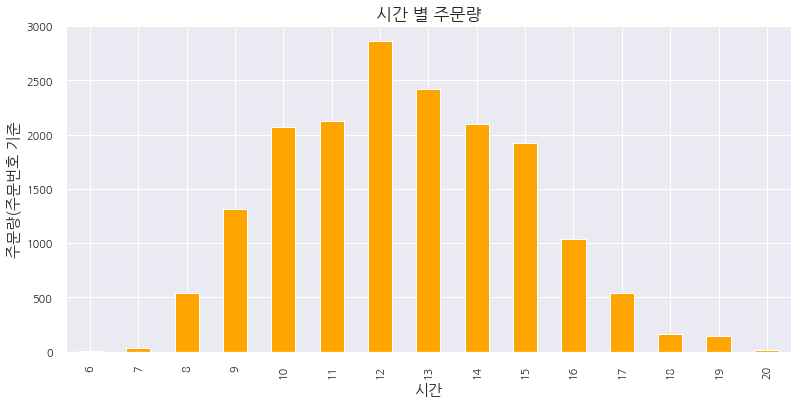

In [49]:
# 시간 별 주문량 확인
g2 = res3.plot(kind='bar', color='orange', figsize=(13, 6))

g2.set_xlabel('시간', fontsize=15)
g2.set_ylabel('주문량(주문번호 기준', fontsize=15)
g2.set_title('시간 별 주문량',fontsize=17)
g2.legend('')

plt.show()

In [50]:
oln1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8


In [51]:
# 국가 별 주문 당 평균 금액 확인
res4 = oln1[['Quantity', 'spent', 'Country', 'InvoiceNo']]
res4

,Quantity,spent,Country,InvoiceNo
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365
4,6,20.34,United Kingdom,536365
...,...,...,...,...
541904,12,10.20,France,581587
541905,6,12.60,France,581587
541906,4,16.60,France,581587
541907,4,16.60,France,581587


In [52]:
# 국가별 주문번호를 집계하고 count = 1로 지정
aa = res4.groupby(['Country', 'InvoiceNo']).sum()
aa['count'] = 1
aa

# InvoiceNo(주문건수)를 세기위한 count 컬럼 추가

Quantity    spent  count
Country     InvoiceNo                          
Australia   536389          107   358.25      1
            537676          214   258.90      1
            539419          146   415.70      1
            540267         4662  7011.38      1
            540280          140   143.00      1
...                         ...      ...    ...
Unspecified 559929          271   252.05      1
            561658          205   347.35      1
            561661          114   199.08      1
            563947          126   252.90      1
            564051           59   278.13      1

[18536 rows x 3 columns]

In [53]:
# aa를 국가별로 sum / 국가별 주문 건수 확인
bb = aa.groupby('Country').sum()
bb

,Quantity,spent,count
Country,,,
Australia,84209,138521.310,57
Austria,4881,10198.680,17
Bahrain,260,548.400,2
Belgium,23237,41196.340,98
Brazil,356,1143.600,1
Canada,2763,3666.380,6
Channel Islands,9491,20450.440,26
Cyprus,6361,13590.380,16
Czech Republic,671,826.740,2


In [54]:
bb['avg_spent'] = bb['spent'] / bb['count']
bb.sort_values(['count', 'avg_spent'], ascending=False, inplace=True)
bb.head()

,Quantity,spent,count,avg_spent
Country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


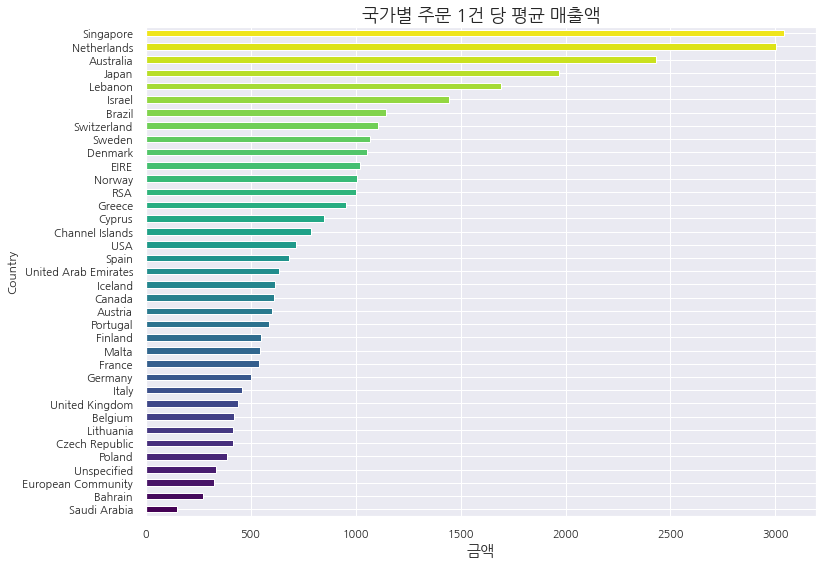

In [55]:
# 국가별 평균 그래프 linspace 함수로 각 나라별 색 지정
color = plt.cm.viridis(np.linspace(0, 1, 38))

bb['avg_spent'].sort_values().plot(kind='barh', figsize=(12, 9), color=color)
plt.title('국가별 주문 1건 당 평균 매출액', fontsize=18)
plt.xlabel('금액', fontsize=15)
plt.show()

In [56]:
oln1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


In [57]:
# Word cloud import
from wordcloud import WordCloud
from wordcloud import STOPWORDS

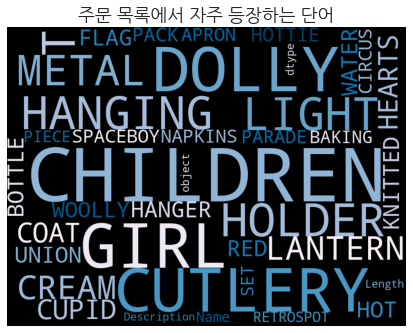

In [58]:
# Word cloud 
stopwords = set(STOPWORDS)
stopwords.add('white') # stopwords.add('제거할 단어')
stopwords.add('heart') # stopwords.add('제거할 단어')

wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=600, colormap='PuBu').generate(str(oln1['Description']))

plt.axis('off')
plt.title('주문 목록에서 자주 등장하는 단어', fontsize = 18)
plt.imshow(wordcloud)
plt.show()

## **Review**

- Online Retail 데이터는:

  총 데이터 수 : 4,335,272

  총 결측치 수 : 136,534 / 전체 데이터의 3.15%

  전체 국가 수 : 38

  전체 판매 물건 수 : 4223
  <br>

- 어떤 고객이 가장 지출을 많이 했나?

  : 고객번호 1689 가장 소비를 많이함

  : 고객번호 3217 가장 소비를 적게함
  <br>

- 상품 금액의 분포는

  : 대체로 2파운드 근처에서 상품 가격대가 형성되어 있다

  : 8파운드 이하의 상품 주문이 93.28 % 를 차지한다.

  : 수익의 88.09 % 는 8 파운드 이하의 상품에서 발생한다
  <br>

- 어떤 물건의 주문량이 높을까?

  : WHITE HANGING HEART T-LIGHT HOLDER
  <br>

- 주문 날짜 별 판매량은?

  : 큰 변동이 없지만 총 3곳에서 큰 판매량이 나옴
  

- 요일 / 시간에 따라서 주문량이 다를까?

  : 목요일 주문이 가장 많고 일요일이 주문이 가장 적다

  : 낮 12시에 주문이 가장 많다
  

- 국가별 고객 1인당 평균 금액은?

  : 영국의 매출액이 가장 높지만, 1인당 구매금액은 싱가포르가 가장 높다
  

- 쇼핑몰 판매 물품의 주요 키워드는

  : white, heartm childern

